In [58]:
import pandas as pd 
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from recommendation import get_recommendations

In [59]:
df=pd.read_csv("dataset.csv")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            45717 non-null  object
 1   Genre            45717 non-null  object
 2   User Rating      25009 non-null  object
 3   Number of Votes  25009 non-null  object
 4   Runtime          32549 non-null  object
 5   Year             45591 non-null  object
 6   Summary          23547 non-null  object
 7   Stars            13676 non-null  object
 8   Certificate      28694 non-null  object
 9   Metascore        341 non-null    object
 10  Gross            25009 non-null  object
 11  Episode          45717 non-null  object
 12  Episode Title    34910 non-null  object
dtypes: object(13)
memory usage: 4.5+ MB


In [61]:
df=df.drop(['Stars'], axis=1)


In [62]:
df=df.drop(['Metascore', 'Episode Title','Episode'], axis=1)

In [63]:
df=df.drop(['Certificate','Runtime','Year'], axis=1)

In [64]:
df.isna().any()

Title              False
Genre              False
User Rating         True
Number of Votes     True
Summary             True
Gross               True
dtype: bool

In [65]:
df = df[pd.to_numeric(df['User Rating'], errors='coerce').notna()]

In [66]:
df['Genre'] = df['Genre'].str.split(', ')
df['User Rating'] = df['User Rating'].astype(float)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

In [67]:
df.isnull().any()

Title              False
Genre              False
User Rating        False
Number of Votes    False
Summary             True
Gross              False
dtype: bool

In [68]:
df = df.dropna(axis=0, how='any')

In [69]:
df.isnull().any()

Title              False
Genre              False
User Rating        False
Number of Votes    False
Summary            False
Gross              False
dtype: bool

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20712 entries, 0 to 45716
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            20712 non-null  object 
 1   Genre            20712 non-null  object 
 2   User Rating      20712 non-null  float64
 3   Number of Votes  20712 non-null  object 
 4   Summary          20712 non-null  object 
 5   Gross            20712 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


In [71]:
duplicate = df[df.duplicated('Title')]
duplicate

,Title,Genre,User Rating,Number of Votes,Summary,Gross
135,Dragon Ball,"[Animation, Action, Adventure]",8.6,"63,122",Dragon Ball tells the tale of a young warrior ...,63122.0
148,Berserk,"[Animation, Action, Adventure]",6.7,"6,943","Guts, ""The Black Swordsman"", is pursued by dem...",6943.0
196,Rurouni Kenshin,"[Animation, Action, Adventure]",8.3,529,"During the violent era known as the Bakumatsu,...",529.0
200,Dragon Ball Z,"[Animation, Action, Adventure]",8.8,"84,577",The adventures of Earth's martial arts defende...,84577.0
268,Hunter x Hunter,"[Animation, Action, Adventure]",8.6,"8,998","The history of Gon Freecs, a boy who left home...",8998.0
...,...,...,...,...,...,...
45710,Demon Slayer: Kimetsu no Yaiba,"[Animation, Action, Adventure]",8.4,"3,401","Two demons, Tamayo and Yushiro come to Tanjiro...",3401.0
45711,Demon Slayer: Kimetsu no Yaiba,"[Animation, Action, Adventure]",8.4,"3,375",With Tamayo coming to Nezuko's aid the battle ...,3375.0
45712,Demon Slayer: Kimetsu no Yaiba,"[Animation, Action, Adventure]",7.3,"3,432",Tanjiro heads to his next location southeast; ...,3432.0
45713,Demon Slayer: Kimetsu no Yaiba,"[Animation, Action, Adventure]",7.9,"3,309",Tanjiro gets separated from Zenitsu when he en...,3309.0


In [72]:
df2=df.drop_duplicates(['Title'])

In [73]:
df2.shape
df2.head()
df2.isna().any()

Title              False
Genre              False
User Rating        False
Number of Votes    False
Summary            False
Gross              False
dtype: bool

In [74]:

df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5743 entries, 0 to 45716
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5743 non-null   object 
 1   Genre            5743 non-null   object 
 2   User Rating      5743 non-null   float64
 3   Number of Votes  5743 non-null   object 
 4   Summary          5743 non-null   object 
 5   Gross            5743 non-null   float64
dtypes: float64(2), object(4)
memory usage: 314.1+ KB


(5743, 6)

<AxesSubplot: ylabel='User Rating'>

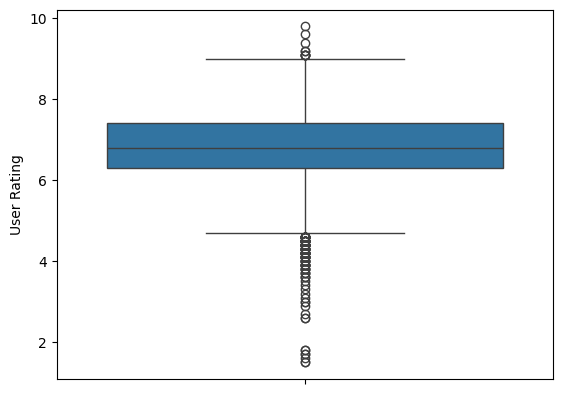

In [75]:
sns.boxplot(df2['User Rating'])

In [76]:
df2.isna().any()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5743 entries, 0 to 45716
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5743 non-null   object 
 1   Genre            5743 non-null   object 
 2   User Rating      5743 non-null   float64
 3   Number of Votes  5743 non-null   object 
 4   Summary          5743 non-null   object 
 5   Gross            5743 non-null   float64
dtypes: float64(2), object(4)
memory usage: 314.1+ KB


In [77]:
df3=df2

In [78]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5743 entries, 0 to 45716
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5743 non-null   object 
 1   Genre            5743 non-null   object 
 2   User Rating      5743 non-null   float64
 3   Number of Votes  5743 non-null   object 
 4   Summary          5743 non-null   object 
 5   Gross            5743 non-null   float64
dtypes: float64(2), object(4)
memory usage: 314.1+ KB


In [79]:
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'[a-zA-Z0-9]+', lowercase=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(df3['Genre'].apply(lambda x: ' '.join(x)))

In [80]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [81]:
cosine_sim

array([[1.        , 1.        , 0.57724466, ..., 0.09381918, 0.08251213,
        0.05827847],
       [1.        , 1.        , 0.57724466, ..., 0.09381918, 0.08251213,
        0.05827847],
       [0.57724466, 0.57724466, 1.        , ..., 0.51097396, 0.4493916 ,
        0.05527288],
       ...,
       [0.09381918, 0.09381918, 0.51097396, ..., 1.        , 0.41907079,
        0.37673178],
       [0.08251213, 0.08251213, 0.4493916 , ..., 0.41907079, 1.        ,
        0.04533156],
       [0.05827847, 0.05827847, 0.05527288, ..., 0.37673178, 0.04533156,
        1.        ]])

In [82]:
df3.head(8)

,Title,Genre,User Rating,Number of Votes,Summary,Gross
0,One Piece,"[Animation, Action, Adventure]",8.9,"187,689",Follows the adventures of Monkey D. Luffy and ...,187689.0
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"[Animation, Action, Adventure]",7.4,"28,895",The film follows the Turtle brothers as they w...,28895.0
2,The Super Mario Bros. Movie,"[Animation, Adventure, Comedy]",7.1,"189,108",A plumber named Mario travels through an under...,189108.0
3,Attack on Titan,"[Animation, Action, Adventure]",9.1,"434,457",After his hometown is destroyed and his mother...,434457.0
4,Jujutsu Kaisen,"[Animation, Action, Adventure]",8.5,"82,909",A boy swallows a cursed talisman - the finger ...,82909.0
5,Bleach: Thousand-Year Blood War,"[Animation, Action, Adventure]",9.1,"28,587",The peace is suddenly broken when warning sire...,28587.0
6,Demon Slayer: Kimetsu no Yaiba,"[Animation, Action, Adventure]",8.6,"131,667",A family is attacked by demons and only two me...,131667.0
7,Puss in Boots: The Last Wish,"[Animation, Adventure, Comedy]",7.8,"153,495",When Puss in Boots discovers that his passion ...,153495.0


In [83]:
df3.reset_index(drop=True, inplace=True)

In [84]:
import pickle

# Serialize the functions and data
functions_data = {
    'get_recommendations': get_recommendations,
    'df3': df3,  # Assuming df3 is your DataFrame
    'cosine_sim': cosine_sim  # Assuming cosine_sim is your cosine similarity matrix
}

# Save to a pickle file
with open('recommendation_system.pkl', 'wb') as file:
    pickle.dump(functions_data, file)



    

In [85]:
'''import pickle

# Load the functions and data from the pickle file
with open('recommendation_system.pkl', 'rb') as file:
    functions_data = pickle.load(file)

# Extract functions and data
get_recommendations = functions_data['get_recommendations']
df3 = functions_data['df3']
cosine_sim = functions_data['cosine_sim']

# Use the recommendation system functions as before
user_input = "Teenage Mutant Ninja Turtles: Mutant Mayhem"       
suggestion = get_recommendations(user_input)
print("Recommended Movies:")
print(suggestion)
'''

'import pickle\n\n# Load the functions and data from the pickle file\nwith open(\'recommendation_system.pkl\', \'rb\') as file:\n    functions_data = pickle.load(file)\n\n# Extract functions and data\nget_recommendations = functions_data[\'get_recommendations\']\ndf3 = functions_data[\'df3\']\ncosine_sim = functions_data[\'cosine_sim\']\n\n# Use the recommendation system functions as before\nuser_input = "Teenage Mutant Ninja Turtles: Mutant Mayhem"       \nsuggestion = get_recommendations(user_input)\nprint("Recommended Movies:")\nprint(suggestion)\n'

In [86]:
with open('recommendation_system.pkl', 'rb') as file:
    functions_data = pickle.load(file)

df3 = functions_data['df3']
cosine_sim = functions_data['cosine_sim']

# Example of calling get_recommendations function
user_input = "Teenage Mutant Ninja Turtles: Mutant Mayhem"
suggestions = get_recommendations(user_input, df3, cosine_sim)
print("Recommended Movies:")
print(suggestions)
       

Recommended Movies:
Title: Teenage Mutant Ninja Turtles: Mutant Mayhem
Summary: The film follows the Turtle brothers as they work to earn the love of New York City while facing down an army of mutants.

Title: Attack on Titan
Summary: After his hometown is destroyed and his mother is killed, young Eren Jaeger vows to cleanse the earth of the giant humanoid Titans that have brought humanity to the brink of extinction.

Title: Jujutsu Kaisen
Summary: A boy swallows a cursed talisman - the finger of a demon - and becomes cursed himself. He enters a shaman's school to be able to locate the demon's other body parts and thus exorcise himself.

Title: Bleach: Thousand-Year Blood War
Summary: The peace is suddenly broken when warning sirens blare through the Soul Society. Residents are disappearing without a trace and nobody knows who's behind it. Meanwhile, a darkness is approaching Ichigo and his friends in Karakura Town.

Title: Demon Slayer: Kimetsu no Yaiba
Summary: A family is attacked b